In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
airline_df = pd.read_csv('data\\raw\\airlines.csv')
airline_df.sample(5)

,IATA_CODE,AIRLINE
1,AA,American Airlines Inc.
3,F9,Frontier Airlines Inc.
10,EV,Atlantic Southeast Airlines
11,HA,Hawaiian Airlines Inc.
0,UA,United Air Lines Inc.


In [7]:
airport_df = pd.read_csv('data\\raw\\airports.csv')
airport_df.sample(5)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
297,SUN,Friedman Memorial Airport,Hailey,ID,USA,43.50484,-114.29659
224,OKC,Will Rogers World Airport,Oklahoma City,OK,USA,35.39309,-97.60073
60,CHS,Charleston International Airport/Charleston AFB,Charleston,SC,USA,32.89865,-80.04051
58,CHA,Chattanooga Metropolitan Airport (Lovell Field),Chattanooga,TN,USA,35.03527,-85.20379
68,CMI,University of Illinois - Willard Airport,Champaign/Urbana,IL,USA,40.03925,-88.27806


In [27]:
flight_df = pd.read_csv('data\\raw\\flights.csv')
flight_df.sample(5)

C:\Users\user\AppData\Local\Temp\ipykernel_11316\2406861582.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flight_df = pd.read_csv('data\\raw\\flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1268831,2015,3,23,1,OO,4683,N548CA,SJC,SLC,1800,...,2101.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5651101,2015,12,21,1,AA,2392,N3EFAA,LAX,ORD,600,...,1151.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3960156,2015,9,3,4,UA,677,N484UA,SFO,RNO,1141,...,1311.0,22.0,0,0,NaN,3.0,0.0,0.0,19.0,0.0
1369390,2015,3,29,7,WN,1093,N939WN,SLC,LAS,2150,...,2201.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5194976,2015,11,21,6,AA,176,N3GTAA,DFW,DCA,1010,...,1358.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
cancel_flight_df = flight_df[['CANCELLED', 'CANCELLATION_REASON']]
flight_df.drop(columns=['CANCELLED', 'CANCELLATION_REASON'], inplace=True)
cancel_flight_df.sample(5)

,CANCELLED,CANCELLATION_REASON
4242545,0,NaN
1505389,0,NaN
2147253,0,NaN
1631625,0,NaN
5427541,0,NaN


In [10]:
flight_df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [22]:
delay_cols = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

In [29]:
flight_df['DELAY'] = flight_df['AIR_SYSTEM_DELAY'].astype('Int16') + flight_df['SECURITY_DELAY'].astype('Int16') + flight_df['AIRLINE_DELAY'].astype('Int16') + flight_df['LATE_AIRCRAFT_DELAY'].astype('Int16') + flight_df['WEATHER_DELAY'].astype('Int16')
# flight_df['DELAY'] = flight_df['DELAY'].fillna(0).astype('Int16')

In [30]:
flight_df['FLIGHT_NUMBER'].corr(flight_df['DELAY'])

np.float64(0.01515487111261943)

In [20]:
flight_df.drop('FLIGHT_NUMBER', axis=1, inplace=True)

In [32]:
flight_df[delay_cols].corrwith(flight_df['DIVERTED']).sort_values(ascending=False)

c:\Program Files\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Program Files\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


AIR_SYSTEM_DELAY      NaN
SECURITY_DELAY        NaN
AIRLINE_DELAY         NaN
LATE_AIRCRAFT_DELAY   NaN
WEATHER_DELAY         NaN
dtype: float64

In [33]:
flight_df.DIVERTED.unique()

array([0, 1])

In [36]:
flight_df.drop(columns=['AIRLINE', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], inplace=True)

<Axes: >

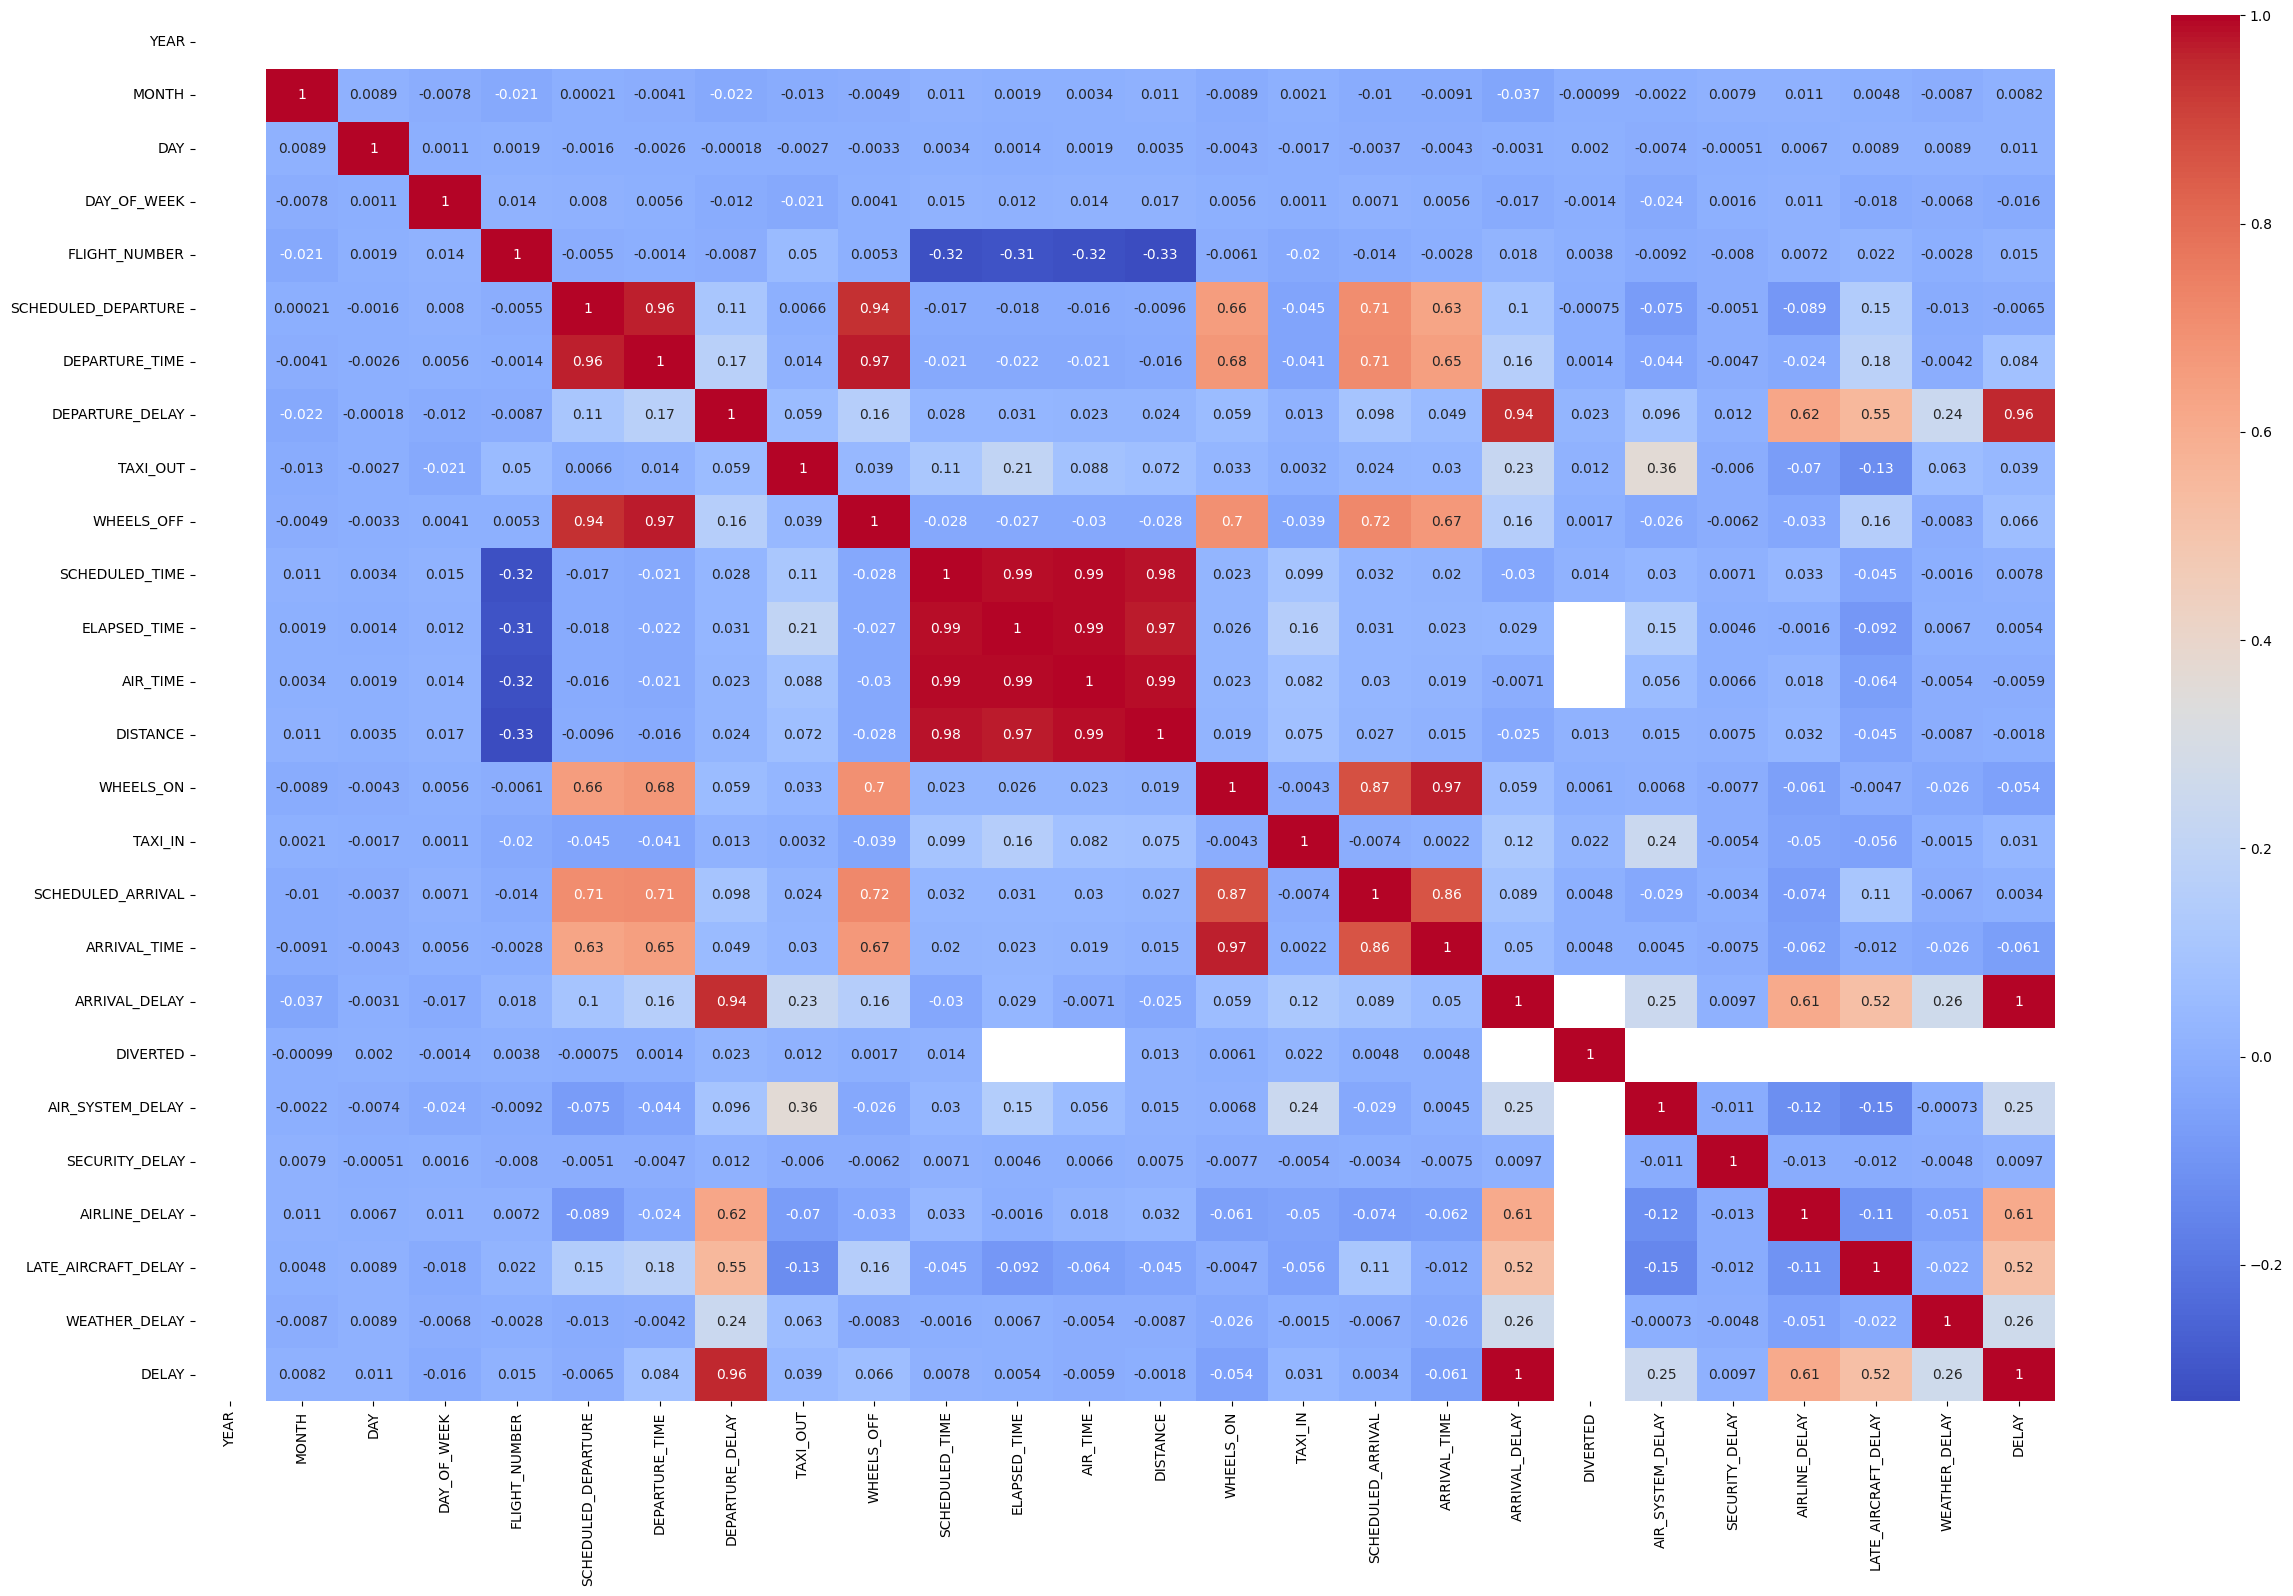

In [42]:
plt.figure(figsize=(30,18))
sns.heatmap(flight_df.corr(), annot=True, cmap='coolwarm')

# no correlation so no model